## Data loading and traing is same as we did for binary class. Just we are taking five classes viz Automobile, Bird, Cat, Deer and Dog

In [2]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [4]:
dict1 = unpickle('data_batch_1')
dict2 = unpickle('data_batch_2')
dict3 = unpickle('data_batch_3')
dict4 = unpickle('data_batch_4')
dict5 = unpickle('data_batch_5')
dict6 = unpickle('test_batch')

labels1 = dict1.get(b'labels')
labels1 = np.array(labels1)
labels2 = dict2.get(b'labels')
labels2 = np.array(labels2)
labels3 = dict3.get(b'labels')
labels3 = np.array(labels3)
labels4 = dict4.get(b'labels')
labels4 = np.array(labels4)
labels5 = dict5.get(b'labels')
labels5 = np.array(labels5)
labels6 = dict6.get(b'labels')
labels6 = np.array(labels6)

data1 = dict1.get(b'data')
data1 = np.array(data1)
data2 = dict2.get(b'data')
data2 = np.array(data2)
data3 = dict3.get(b'data')
data3 = np.array(data3)
data4 = dict4.get(b'data')
data4 = np.array(data4)
data5 = dict5.get(b'data')
data5 = np.array(data5)
data6 = dict6.get(b'data')
data6 = np.array(data6)

data = np.concatenate((data1,data2,data3,data4,data5,data6), axis= 0)
labels = np.concatenate((labels1,labels2,labels3,labels4,labels5,labels6), axis=0)

data.shape, labels.shape

((60000, 3072), (60000,))

In [5]:
def five_objects_five_labels(data, labels, l1, l2, l3, l4, l5):
    indices_label0 = np.nonzero(labels == l1)
    indices_label1 = np.nonzero(labels == l2)
    indices_label2 = np.nonzero(labels == l3)
    indices_label3 = np.nonzero(labels == l4)
    indices_label4 = np.nonzero(labels == l5)
    a = np.array(np.nonzero(labels == l1))
    b = np.array(np.nonzero(labels == l2))
    c = np.array(np.nonzero(labels == l3))
    d = np.array(np.nonzero(labels == l4))
    e = np.array(np.nonzero(labels == l5))
    f = np.concatenate((a,b,c,d,e), axis = 1).flatten()
    np.random.shuffle(f)
    x = data[f]
    y = labels[f]
    y = np.where(y==l1, 0, y)
    y = np.where(y==l2, 1, y)
    y = np.where(y==l3, 2, y)
    y = np.where(y==l4, 3, y)
    y = np.where(y==l5, 4, y)
    X_train = x/255
    X_train = (X_train - np.mean(X_train))/np.std(X_train)
    Y_train = y
    x_train = X_train[:24000]
    y_train = Y_train[:24000]
    x_test = X_train[24000:30000]
    y_test = Y_train[24000:30000]
    y_train = y_train.reshape(len(y_train),1)
    y_test = y_test.reshape(len(y_test),1)
    y_test = y_test.T
    X_train_tensor = torch.tensor(x_train.reshape(24000,3,32,32)).double()
    X_test_tensor = torch.tensor(x_test.reshape(6000,3,32,32)).double()
    y_exp = torch.tensor(y_train).long()
    y_expp = y_exp.reshape(24000,)
    Y_test_tensor = torch.tensor(y_test).long()
    Y_test_expected = Y_test_tensor.reshape(6000,)
    
    
   
    return X_train_tensor,y_expp, X_test_tensor ,Y_test_expected

In [6]:
X_train_tensor,Y_train_tensor, X_test_tensor ,Y_test_expected = five_objects_five_labels(data, labels, 1, 2, 3, 4, 5)

In [7]:
X_train_tensor.shape,Y_train_tensor.shape, X_test_tensor.shape ,Y_test_expected.shape

(torch.Size([24000, 3, 32, 32]),
 torch.Size([24000]),
 torch.Size([6000, 3, 32, 32]),
 torch.Size([6000]))

In [8]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 6 ,kernel_size =5)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 12, kernel_size =5)
        
        self.fc1 = nn.Linear(in_features = 12*5*5, out_features = 120)
        self.fc2 = nn.Linear(in_features = 120, out_features = 60)
        self.out = nn.Linear(in_features = 60, out_features = 5)
        
    def forward(self, t):
        t = t 
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)
        t = t.reshape(-1, 12*5*5)
        t = self.fc1(t)
        t = F.relu(t)
        t = self.fc2(t)
        t = F.relu(t)
        t = self.out(t)
      
        return t

Epoch number = 1
Loss function value:  [1.16538183]


Epoch number = 2
Loss function value:  [1.00327363]


Epoch number = 3
Loss function value:  [0.93462317]


Epoch number = 4
Loss function value:  [0.88112098]


Epoch number = 5
Loss function value:  [0.83450966]


Epoch number = 6
Loss function value:  [0.78976867]


Epoch number = 7
Loss function value:  [0.74594236]


Epoch number = 8
Loss function value:  [0.70357636]


Epoch number = 9
Loss function value:  [0.663532]


Epoch number = 10
Loss function value:  [0.62693035]


Epoch number = 11
Loss function value:  [0.58894229]


Epoch number = 12
Loss function value:  [0.55528921]


Epoch number = 13
Loss function value:  [0.52194211]


Epoch number = 14
Loss function value:  [0.49015708]


Epoch number = 15
Loss function value:  [0.46117697]


Epoch number = 16
Loss function value:  [0.4316999]


Epoch number = 17
Loss function value:  [0.40605548]


Epoch number = 18
Loss function value:  [0.38362745]


Epoch number = 19
Loss

Text(0, 0.5, 'Loss')

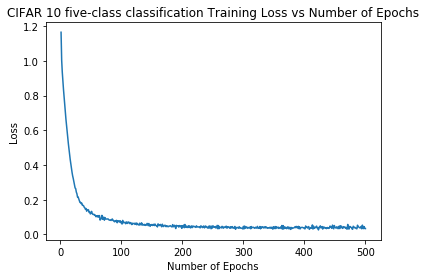

In [11]:
network = Network()
network = network.double()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(network.parameters(), lr = 0.0005)
epochs = 500
loss_history = []
loss_per_epoch = np.zeros((epochs,1))
batch_size = 10
train_data_len = len(Y_train_tensor)
for j in range(epochs):
    for i in range(int(train_data_len/batch_size)):
        batch_start =  i*batch_size
        batch_end = (i+1)*batch_size
        x_trainb_tensor = X_train_tensor[batch_start:batch_end]         ### Get batch of images
        y_trainb_tensor = Y_train_tensor[batch_start:batch_end]         ### Get batch of labels
        preds = network(x_trainb_tensor)                                ### Pass the batch  
        loss = criterion(preds, y_trainb_tensor)                        ### Calculate loss                                                            
        loss.backward()                                                 ### Calculate gradients
        optimizer.step()                                                ### Update weights
        optimizer.zero_grad()                                                    
        loss_history.append(loss.item())
        
    loss_array = np.array(loss_history)
    loss_per_epoch[j] = np.mean(loss_array)
    loss_history = []
    
    print('Epoch number = ' + str(j+1))
    print('Loss function value: ', loss_per_epoch[j])
    print('\n')

    

total = len(Y_train_tensor)
correct = 0
for i in range(24):
    outputs = network(X_train_tensor[1000*i:1000*(i+1)])
    _, predicted = torch.max(outputs, 1)
    correct += (predicted == Y_train_tensor[1000*i:1000*(i+1)]).sum().item()
print('Accuracy of the network on the 5 labels test images:'+ str((correct/total)*100))

        
yy = loss_per_epoch
xx = np.arange(1,epochs+1)
plt.plot(xx,yy)
plt.title('CIFAR 10 five-class classification Training Loss vs Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')

In [12]:
total_test = 6000
correct_test = 0
for i in range(6):
    outputs_test = network(X_test_tensor[1000*i:1000*(i+1)])
    _, predicted_test = torch.max(outputs_test, 1)
    correct_test += (predicted_test == Y_test_expected[1000*i:1000*(i+1)]).sum().item()
print('Accuracy of the network on 5 classes of the 1000 test images: '+ str((correct_test/total_test)*100))

Accuracy of the network on 5 classes of the 1000 test images: 60.95


## I got 98.41 % train accuracy which is no satisfying but can be increased by tweaking Convolutional layer. As we are having Cat and Dog in the object detection it might have affected the training accuracy and testing too. As these to classes give least accuracy. Testing accuracy that we got is 60.95 %